<center><h1>Creating a Kaggle Workflow<h1><center>

    
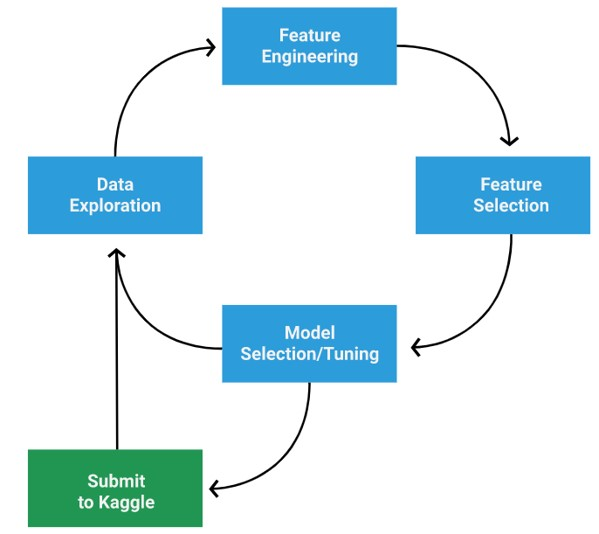

## Introduction

The workflow diagram above identifies four key components to execute machine learning problem solving as efficiently and as error free as possible. The sequence is as follows:

1. **<span style="color:blue">Data exploration</span>**, to find patterns in the data

2. **<span style="color:blue">Feature engineering</span>**, to create new features from those patterns or through pure experimentation

3. **<span style="color:blue">Feature selection</span>**, to select the best subset of our current set of features

4. **<span style="color:blue">Model selection/tuning</span>**, training a number of models with different hyperparameters to find the best performer.

Data science, and particularly machine learning, contain many dimensions of complexity when compared with standard software development.

In standard software development, code not working as you expect can be caused by a number of factors along two dimensions:

- Bugs in implementation
- Algorithm design

Machine learning problems, have many more dimensions:

- Bugs in implementation
- Algorithm design
- Model issues
- Data quality

By defining a workflow as shown above and following it, you can give yourself a framework with which to make iterating on ideas quicker and easier, allowing yourself to work more efficiently.

## Kaggle Competition Description

This project is focused on entering a Kaggle Competition titled, 'Titanic: Machine Learning From Disaster'.

In this competition, we have a data set of different information about passengers onboard the Titanic, and we want to see if we can use that information to predict whether those people survived or not.

Each Kaggle competition has two key data files that you will work with - a training set and a testing set.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

Here is a list and description of the columns in the 'Train' data set. The 'Test' data set includes all these except for 'Survived'.

- **PassengerID** - A column added by Kaggle to identify each row and make submissions easier
- **Survived** - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- **Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- **Sex** - The passenger's sex
- **Age** - The passenger's age in years
- **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
- **Parch** - The number of parents or children the passenger had aboard the Titanic
- **Ticket** - The passenger's ticket number
- **Fare** - The fare the passenger paid
- **Cabin** - The passenger's cabin number
- **Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

## Project Goal

The goal of this project is to follow the machine learning workflow process to:

- make competing in the Kaggle Titanic competition easier, using a pipeline of functions to reduce the number of dimensions I need to focus on and
- to get as close as possible to correctly predicting (100%) the number of passengers who died and who survived.

<center><h1><span style="color:blue">Data Exploration</span><h1><center>

In [1]:
# import appropriate python libraries for coding executions.
import pandas as pd
import numpy as np
from IPython.display import HTML
from IPython.display import display, Markdown
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

train = pd.read_csv("train.csv", na_values="NaN")
holdout = pd.read_csv("test.csv")

print(train.shape, '\n')
print(holdout.shape, '\n')
print(train.info(), '\n')
print(holdout.info(), '\n')
display(Markdown('<h3><span style="color:blue"> Train Data  </span></h3>'))
display(train.head(), '\n')
display(Markdown('<h3><span style="color:blue"> Test Data  </span></h3>'))
display(holdout.head())

(891, 12) 

(418, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

<h3><span style="color:blue"> Train Data  </span></h3>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'\n'

<h3><span style="color:blue"> Test Data  </span></h3>

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<center><h1><span style="color:blue">Feature Engineering</span><h1><center>

In [2]:
# handle various missing values from the data set.
def process_missing(df):
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

# convert age data into groups of age ranges.
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

# convert fare data into groups of fare ranges.
def process_fare(df):
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

# convert cabin data into groups of cabin 'types'.
def process_cabin(df):
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

# extract and categorize the title from the name column
def process_titles(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

# create Dummy Columns from a single Column
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [3]:
# execute the define functions from above.
def pre_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)

    for col in ["Age_categories","Fare_categories",
                "Title","Cabin_type","Sex"]:
        df = create_dummies(df,col)
    
    return df

train = pre_process(train)
holdout = pre_process(holdout)

print(train.info())
print(holdout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Title               

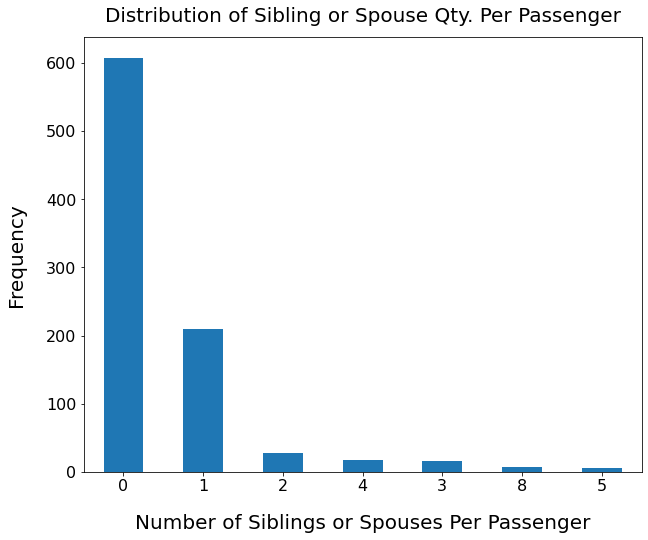

In [4]:
# generate a histogram plot to observe distribution of sibling and spouse qty. per passenger.
fig, ax = plt.subplots(figsize=[10,8])
train['SibSp'].value_counts().plot(ax=ax, kind='bar')
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Sibling or Spouse Qty. Per Passenger', fontsize=20, pad=15)
plt.xlabel('Number of Siblings or Spouses Per Passenger', fontsize=20, labelpad = 20) 
plt.ylabel('Frequency', fontsize=20, labelpad = 20)
plt.show()

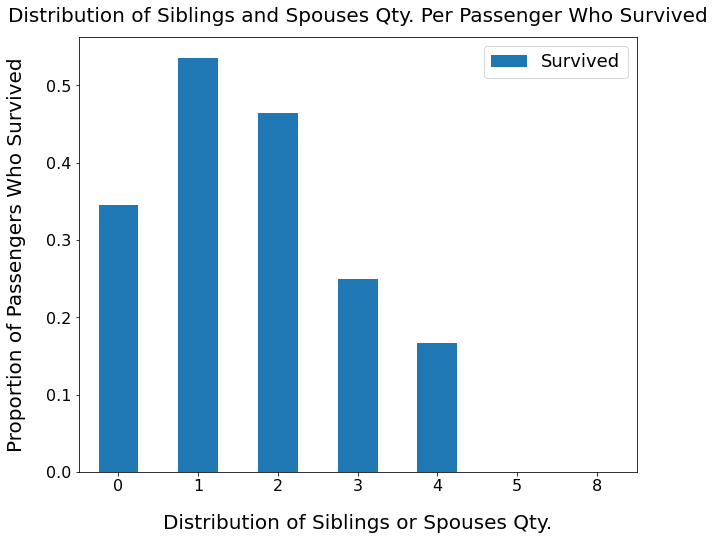

In [5]:
# generate a histogram plot to observe relationship between sibling 
# and spouse qty. per passenger and proportion of survivors.
SibSp_pivot = train.pivot_table(index="SibSp",values="Survived")
SibSp_pivot.plot.bar(figsize=[10,8])
plt.legend(prop={"size":18})
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Siblings and Spouses Qty. Per Passenger Who Survived', fontsize=20, pad=15)
plt.xlabel('Distribution of Siblings or Spouses Qty.', fontsize=20, labelpad = 20) 
plt.ylabel('Proportion of Passengers Who Survived', fontsize=20, labelpad = 20)
plt.show()


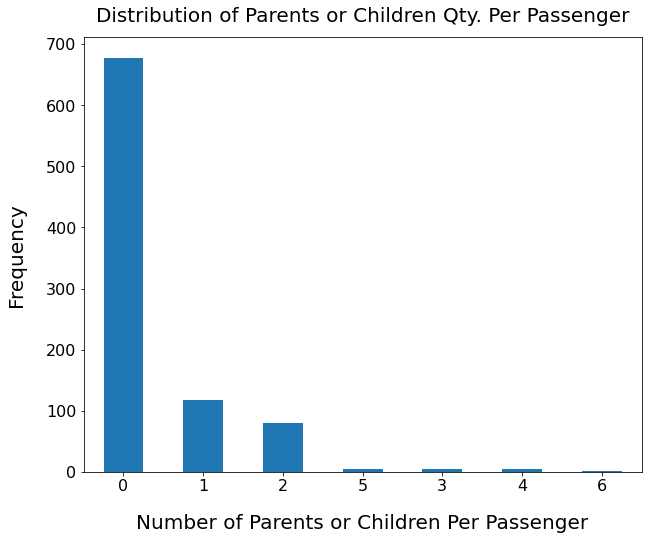

In [6]:
# generate a histogram plot to observe distribution of parents or children qty. per passenger.
fig, ax = plt.subplots(figsize=[10,8])
train['Parch'].value_counts().plot(ax=ax, kind='bar')
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Parents or Children Qty. Per Passenger', fontsize=20, pad=15)
plt.xlabel('Number of Parents or Children Per Passenger', fontsize=20, labelpad = 20) 
plt.ylabel('Frequency', fontsize=20, labelpad = 20)
plt.show()

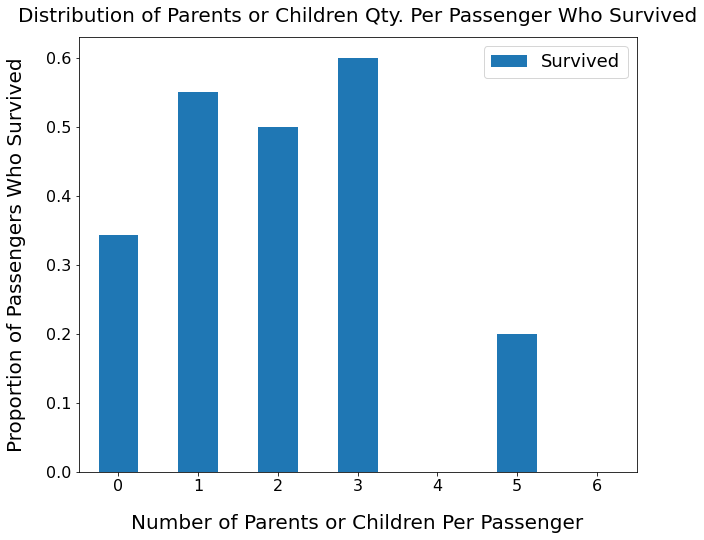

In [7]:
# generate a histogram plot to observe relationship between parent 
# and children qty. per passenger and proportion of survivors.
Parch_pivot = train.pivot_table(index="Parch",values="Survived")
Parch_pivot.plot.bar(figsize=[10,8])
plt.legend(prop={"size":18})
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Parents or Children Qty. Per Passenger Who Survived', fontsize=20, pad=15)
plt.xlabel('Number of Parents or Children Per Passenger', fontsize=20, labelpad = 20) 
plt.ylabel('Proportion of Passengers Who Survived', fontsize=20, labelpad = 20)
plt.show()

In [8]:
# add another feature: sum of siblings, spouses, parents
# and children for each passenger. This may be a significant
# factor in the predictor equation.
print(train['SibSp'].value_counts(dropna=False))
print(train['Parch'].value_counts(dropna=False))

SibSp_Parch = train['SibSp'] + train['Parch']
train['SibSp_Parch'] = SibSp_Parch

SibSp_Parch = holdout['SibSp'] + holdout['Parch']
holdout['SibSp_Parch'] = SibSp_Parch

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


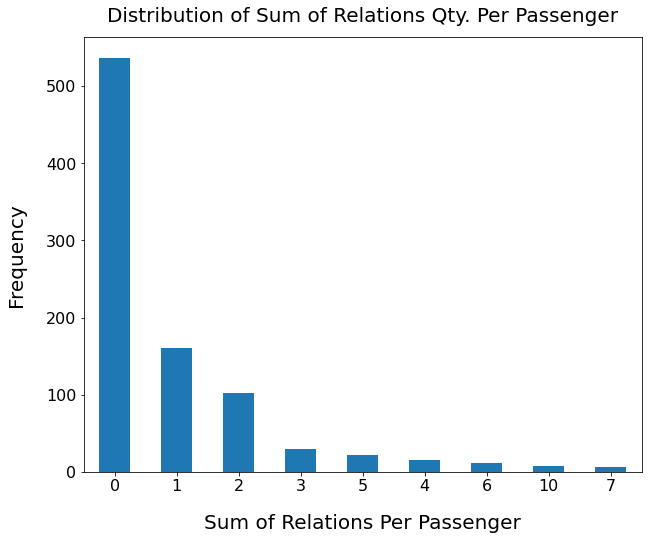

In [9]:
# generate a histogram plot to observe distribution of
# sum of relations qty. per passenger.
fig, ax = plt.subplots(figsize=[10,8])
train['SibSp_Parch'].value_counts().plot(ax=ax, kind='bar')
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Sum of Relations Qty. Per Passenger', fontsize=20, pad=15)
plt.xlabel('Sum of Relations Per Passenger', fontsize=20, labelpad = 20) 
plt.ylabel('Frequency', fontsize=20, labelpad = 20)
plt.show()

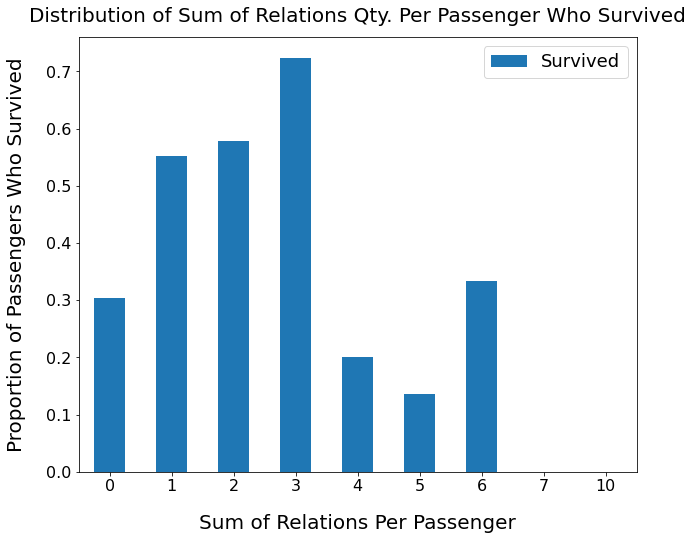

In [10]:
# generate a histogram plot to observe relationship between sum 
# of relations qty. per passenger and proportion of survivors.
Parch_pivot = train.pivot_table(index="SibSp_Parch",values="Survived")
Parch_pivot.plot.bar(figsize=[10,8])
plt.legend(prop={"size":18})
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Sum of Relations Qty. Per Passenger Who Survived',\
          fontsize=20, pad=15)
plt.xlabel('Sum of Relations Per Passenger', fontsize=20, labelpad = 20) 
plt.ylabel('Proportion of Passengers Who Survived', fontsize=20, labelpad = 20)
plt.show()

## Observations

Sixty-eight percent of the passengers in the 'Test' data file had no relations on board, that is they were alone.

The histogram above shows that only thirty percent of the passengers who were alone survived. This could be a significant factor to add to the appropriate predictor model.

In [11]:
# add another binary feature defined as '1' for passengers
# with no relations on board and '0' for passengers with one
# or more relations on board.
def newdf(df):
    df['isalone'] = np.where(df['SibSp_Parch'] == 0, 1, 0)
    return df

train = newdf(train)
holdout = newdf(holdout)

print(train.info())
print(holdout.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Title               

<center><h1><span style="color:blue">Feature Selection</span><h1><center>

In [12]:
# use the classification algorithm 'RandomForestClassifier'
# to determine the best columns to use in the predictor model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    # remove non-numeric columns, columns that have null values.
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Survived","PassengerId"],axis=1)
    all_y = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf,cv=10)
    selector.fit(all_X,all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

cols = select_features(train)

Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'SibSp_Parch']



# <center><span style="color:blue">Model Selection/Tuning</span><center>
    
I will write a function to do the heavy lifting of model selection and tuning. The function I'll create will use three different algorithms and use grid search to train using different combinations of hyperparameters to find the best performing model.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(max_iter=1000),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train,cols)

print(result)

LogisticRegression
------------------
Best Score: 0.821598002496879
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.7822971285892635
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8350686641697876
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}

[{'name': 'LogisticRegression', 'estimator': LogisticRegression(max_iter=1000), 'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'best_params': {'solver': 'newton-cg'}, 'best_score': 0.821598002496879, 'best_model': LogisticRegression(max_iter=1000, solver='newton-cg')}, {'name': 'KNeighborsClassifier', 'estimator': KNeighborsClassifier(), 'hyperparameters': {'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 

In [14]:
# choose the model with highest score to use on the 'Test'
# data and submit file outcome to Kaggle.
def save_submission_file(model,cols,filename="submission_9.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model,cols)

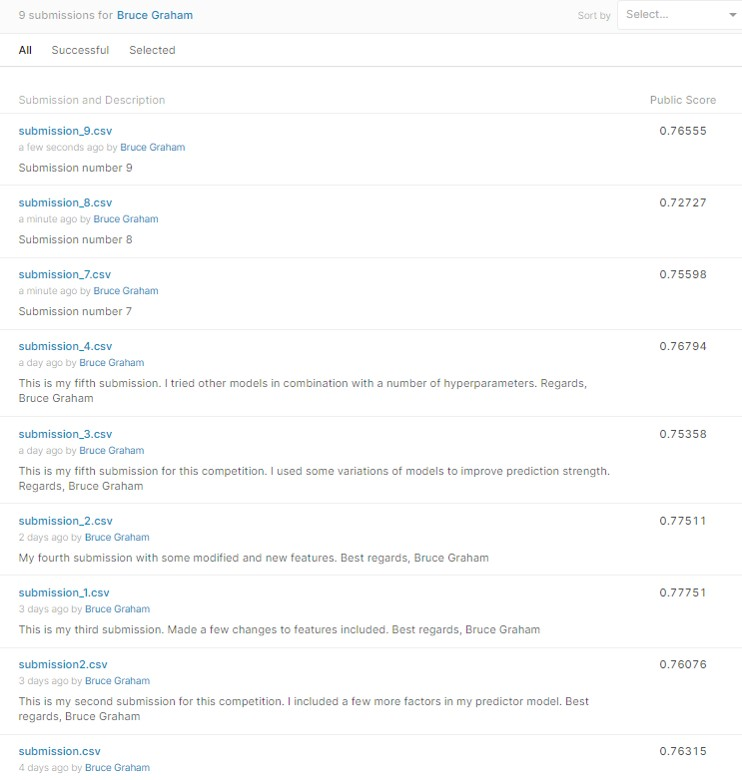

# <center><span style="color:blue">Conclusion</span><center>
    
My score result from this project outcome submission (submission_9.csv) was 0.76555. In the summary table above taken from the Kaggle Titanic competition shows the score results of all of my submissions prior to this project as well.
    
My third submission had a higher score (0.77751) than the one from this project. Not a huge difference though.
    
**<span style="color:red">One thing I observed from all of my submissions is that a higher model prediction score on 'Train' data does not necessarily generate a higher score on 'Test' data.</span>** 